# Volcanic Eruption Impact on Climate: Zonal Wind
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [7]:
!date

Mon Feb  5 15:01:35 EST 2018


In [8]:
from plotsetting import *
from geoplots import mapplot
import matplotlib.pyplot as plt
plt.rcParams['hatch.color']='g'
import geoxarray
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import ttest_1samp

from data_CTL1860 import open_ensemble as get_ctl
from data_agung import open_data as get_agung
from data_chichon import open_data as get_chichon

%matplotlib notebook

In [9]:
year_agung = 1963
year_chichon = 1982
data_name = 'ucomp'
#ens = range(1,31)
ens = range(1,24+1)

new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_agung).rename(new_names).mean('lon')
da_ctl_c = get_ctl(data_name, ens=ens, year_volcano=year_chichon).rename(new_names).mean('lon')#control with years shifted to Chichon
da_agung = get_agung(data_name, ens=ens).rename(new_names).mean('lon')
da_chichon = get_chichon(data_name, ens=ens).rename(new_names).mean('lon')

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


### Ensemble-mean Seasonal-mean Anomaly Map

#### Agung

In [10]:
daa = da_agung - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


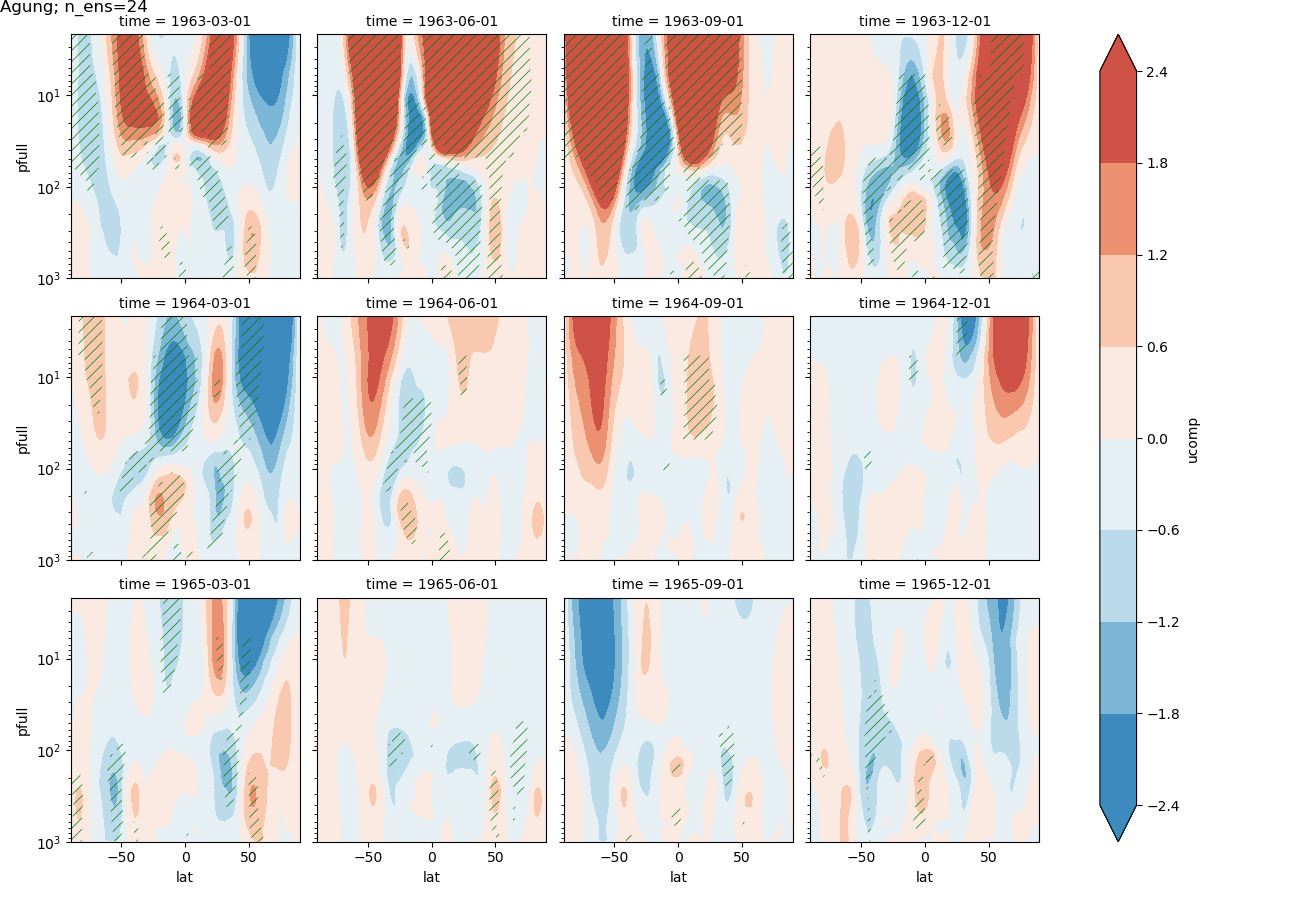

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'facecolor'
  s)


Text(0,1,'Agung; n_ens=24')

In [11]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both', yincrease=False)
for ii, ax in enumerate(f.axes.flat):
#     mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False, yincrease=False)
    ax.set_yscale('log')
plt.suptitle(f'Agung; n_ens={len(ens)}', x=0, y=1, ha='left')

#### Chichon

In [12]:
daa = da_chichon - da_ctl_c# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


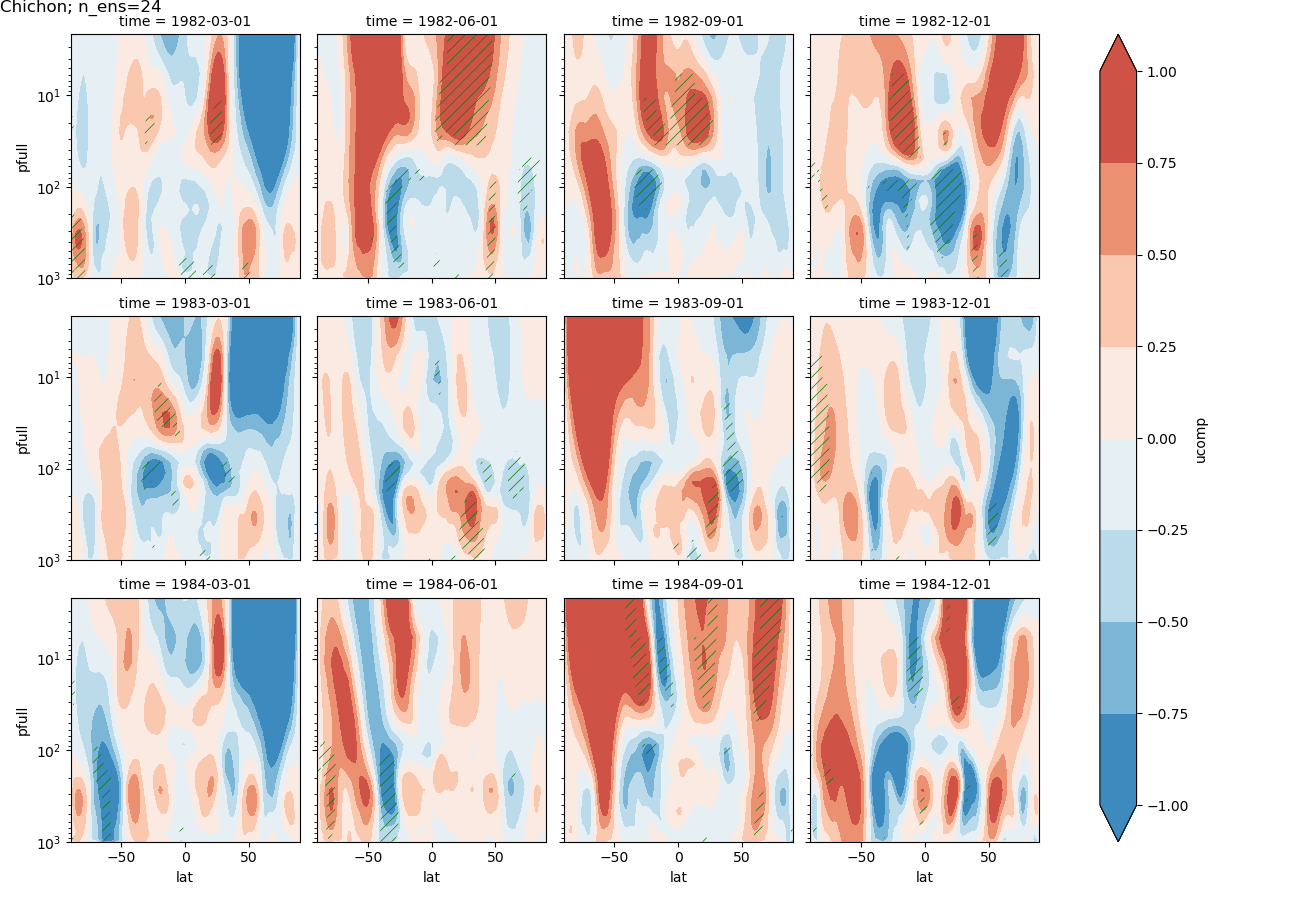

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'facecolor'
  s)


Text(0,1,'Chichon; n_ens=24')

In [13]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both', yincrease=False)
for ii, ax in enumerate(f.axes.flat):
#     mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False, yincrease=False)
    ax.set_yscale('log')
plt.suptitle(f'Chichon; n_ens={len(ens)}', x=0, y=1, ha='left')